In [1]:
import pandas as pd

In [2]:
tweets = pd.read_csv('../data/tweets.csv', encoding='latin-1')

In [3]:
tweets.head()

,text,favoriteCount,created,screenName,retweetCount,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
0,"Morning, vrienden en @minpres #briefjevanjan h...",100,2017-03-23 06:26:12,jndkgrf,64,0,0,0,0,0,0,0,0,0,0
1,Toch nog: loon naar werken! https://t.co/bkPtG...,30,2017-03-28 22:23:24,LodewijkA,21,0,0,0,0,0,0,0,0,0,0
2,@LodewijkA 1 mei 2013 ingediend in 2e kamer. V...,16,2017-03-28 20:01:42,LodewijkA,17,0,0,0,0,0,0,0,0,0,0
3,De wetsgeschiedenis van de wet minimumloon pos...,15,2017-03-28 20:00:40,LodewijkA,17,0,0,0,0,0,0,0,0,0,0
4,@ChristaOosterb Dankje!,0,2017-03-28 18:56:33,LodewijkA,0,0,0,0,0,0,0,0,0,0,0


In [12]:
tweets_march = tweets[pd.to_datetime(tweets['created']).dt.month == 3].groupby('screenName').agg(
    anger = ('anger','sum'),
    anticipation = ('anticipation','sum'),
    disgust = ('disgust','sum'),
    negative = ('negative','sum'),
    count = ('screenName','count'))
tweets_march['anger_index'] = tweets_march.anger/tweets_march['count']
tweets_march['disgust_index'] = tweets_march.disgust/tweets_march['count']
tweets_march['negative_index'] = tweets_march.negative/tweets_march['count']

In [13]:
tweets_march

,anger,anticipation,disgust,negative,count,anger_index,disgust_index,negative_index
screenName,,,,,,,,
APechtold,0,13,3,4,71,0.000000,0.042254,0.056338
HenkKrol,28,27,18,45,141,0.198582,0.127660,0.319149
JacquesMonasch,3,6,1,9,44,0.068182,0.022727,0.204545
KleinNorbert,14,18,5,29,98,0.142857,0.051020,0.295918
LavieJanRoos,9,15,3,11,125,0.072000,0.024000,0.088000
LodewijkA,3,2,1,3,48,0.062500,0.020833,0.062500
emileroemer,2,1,1,3,7,0.285714,0.142857,0.428571
geertwilderspvv,2,1,0,3,28,0.071429,0.000000,0.107143
gertjansegers,6,35,3,8,165,0.036364,0.018182,0.048485


In [5]:
import plotly.express as px

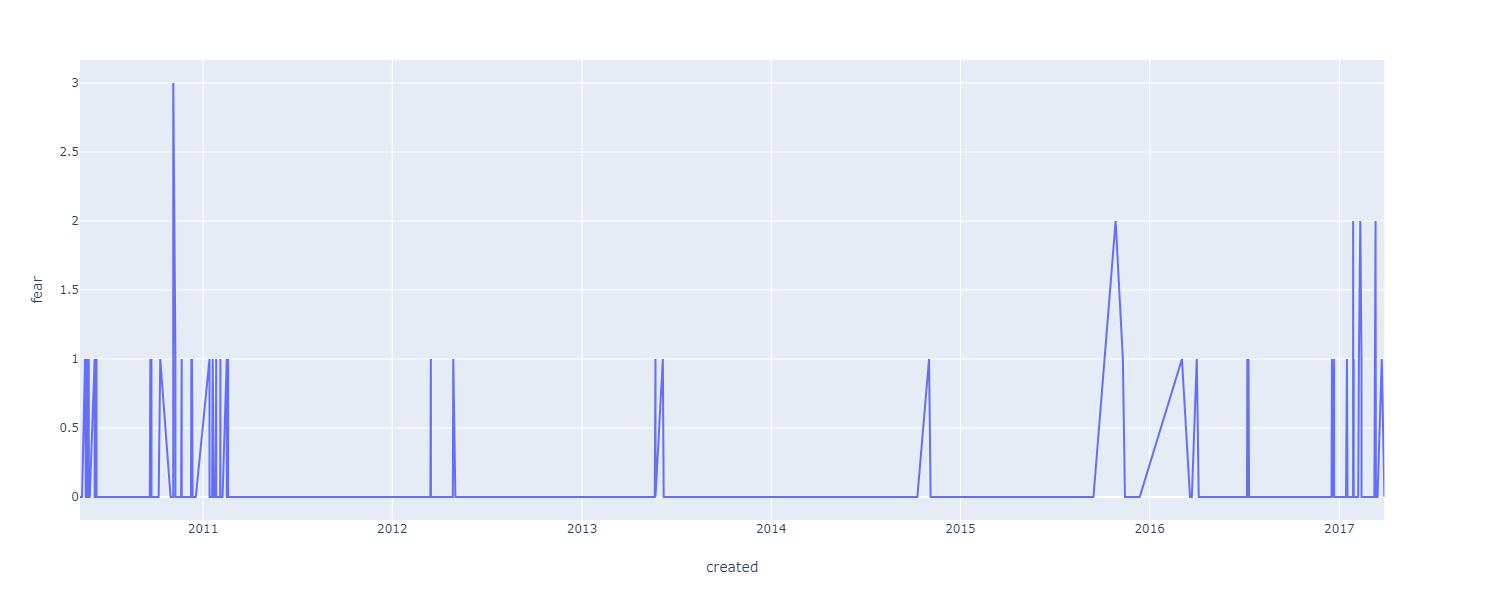

In [15]:
px.line(
    tweets[tweets.screenName == 'jesseklaver'], 
    x='created', 
    y='fear'
)